In [105]:
%load_ext autoreload
%autoreload 2

from actor_critic import ActorCriticAgent
import gym
import numpy as np
from utils import plot_learning_curve
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
env = gym.make('CartPole-v1')
# Example usage
# Assuming you have a gym environment called 'env'
input_size = env.observation_space.shape[0]
n_actions = env.action_space.n
n_games = 5000

agent = ActorCriticAgent(input_size, n_actions)

filename = 'cartpole_1e-5_1024x512_1800games.png'

figure_file = 'plots/' + filename

best_score = env.reward_range[0]
score_history = []
load_checkpoint = False

if load_checkpoint:
    agent.load_models()

for i in range(n_games):
    observation = env.reset()[0]
    done = False
    score = 0
    while not done:
        action = agent.choose_action(observation)
        observation_next, reward, done, info, _ = env.step(action)
        score += reward
        if not load_checkpoint:
            agent.update(observation, reward, observation_next, done)
        observation = observation_next
    score_history.append(score)
    avg_score = np.mean(score_history[-100:])

    if avg_score > best_score:
        best_score = avg_score
        if not load_checkpoint:
            agent.save_models()

    print('episode ', i, 'score %.1f' % score, 'avg_score %.1f' % avg_score)


... saving models ...
episode  0 score 26.0 avg_score 26.0
... saving models ...
episode  1 score 42.0 avg_score 34.0
... saving models ...
episode  2 score 51.0 avg_score 39.7
episode  3 score 22.0 avg_score 35.2
episode  4 score 29.0 avg_score 34.0
episode  5 score 20.0 avg_score 31.7
episode  6 score 58.0 avg_score 35.4
episode  7 score 67.0 avg_score 39.4
episode  8 score 37.0 avg_score 39.1
... saving models ...
episode  9 score 65.0 avg_score 41.7
... saving models ...
episode  10 score 44.0 avg_score 41.9
... saving models ...
episode  11 score 42.0 avg_score 41.9
episode  12 score 34.0 avg_score 41.3
episode  13 score 33.0 avg_score 40.7
episode  14 score 42.0 avg_score 40.8
... saving models ...
episode  15 score 107.0 avg_score 44.9
... saving models ...
episode  16 score 72.0 avg_score 46.5
... saving models ...
episode  17 score 55.0 avg_score 47.0
... saving models ...
episode  18 score 115.0 avg_score 50.6
... saving models ...
episode  19 score 104.0 avg_score 53.2
... s

KeyboardInterrupt: 

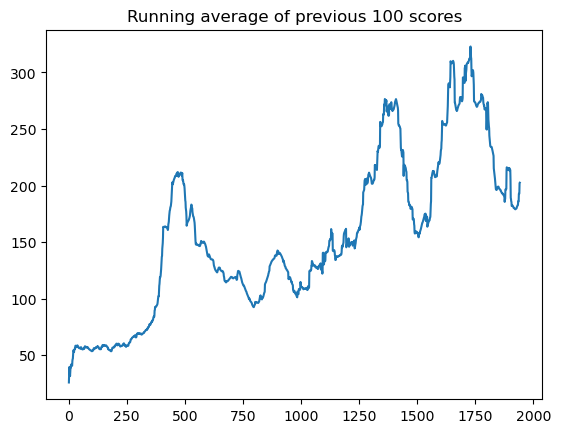

In [110]:
x = [i + 1 for i in range(1942)]
plot_learning_curve(x, score_history)

In [86]:
figure_file

'plots/cartpole_1e-5_1024x512_1800games.png'

In [ ]:
agent.model

In [93]:
agent.model.checkpoint_file

'./actor_critic/actor_critic_ac'

In [87]:
x

[1, 2, 3, 4, 5]

In [88]:
score_history

[11.0, 9.0, 10.0, 8.0, 9.0, 10.0]

In [89]:
for i in range(n_games):
    print(i)

0
1
2
3
4
